In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("processed_review.csv")

In [3]:
df

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,think wonder way spend time hot summer weekend...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,think movi right good job creativ origin first...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol teach parochi elementari school nun tea...,negative
49998,go disagre previous comment side maltin one se...,negative


### Функции для визуализации матрицы ошибок и подсчета метрик

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score

Функция для красивого отображения матрицы ошибок

In [5]:
def build_conf_matrix(labels, predict, class_name):
    lab, pred = [], []
    for i in range(len(labels)):
        if predict[i] == class_name:
            pred.append(0)
        else:
            pred.append(1)
        if labels[i] == class_name:
            lab.append(0)
        else:
            lab.append(1)
    return confusion_matrix(lab, pred, normalize='true')

In [6]:
get_res = {0: "Negative", 1: "Positive"}

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def get_confusion_matrix_picture(y_test, y_pred, path):
    for i in range(2):
        plt.figure(figsize=(8, 6), dpi=70)
        heatmap = sns.heatmap(build_conf_matrix(y_test, y_pred, i), annot=True, cmap='YlGnBu')
        heatmap.set_title(get_res[i], fontdict={'fontsize':14}, pad=10)
        plt.xlabel('Предсказанный класс')
        plt.ylabel('Истинный класс')
        dir_list = [x[0] for x in os.walk("./")]
        is_exists = False
        for dir in dir_list:
            if path in dir:
                is_exists = True
                break
        if not is_exists:
            os.mkdir(path)
        plt.savefig(f"{path}/{i}.png", dpi=300)
        plt.show()

### Использование Bag of words и обучение на нём моделей

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
X = df["review"]
y = df["sentiment"]

In [33]:
# Для замены значений целевого признака на 1 и 0
# positive - 1
# negative - 0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Bag-of-words
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

#### MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
modelNB = MultinomialNB()

In [36]:
modelNB.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred = modelNB.predict(X_test)

2 min 12 sec - train

33 sec - test

In [38]:
print(confusion_matrix(y_test, y_pred))
print('accuracy:{}'.format(accuracy_score(y_test, y_pred)))
print('precision:{}'.format(precision_score(y_test, y_pred ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, y_pred, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, y_pred, average='weighted')))

[[4300  600]
 [ 802 4298]]
accuracy:0.8598
precision:0.860500824423092
recall:0.8598
f1-score:0.8597994335919775


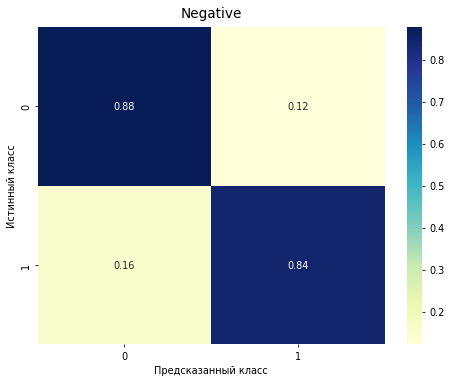

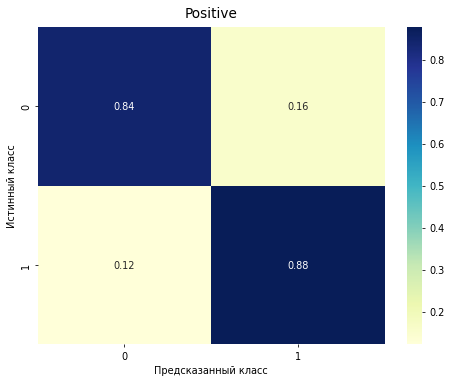

In [53]:
get_confusion_matrix_picture(y_test, y_pred, "MultinomialNB bow")

#### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(penalty='l2',max_iter=100,C=1,random_state=42)

#Обучение модели на bag of words
lr_bow = lr.fit(X_train, y_train)
print(lr_bow)

LogisticRegression(C=1, random_state=42)


C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
lr_bow_predict = lr.predict(X_test)

8 min 36 sec - train

57 sec - test

In [16]:
print(confusion_matrix(y_test, lr_bow_predict))
print('accuracy:{}'.format(accuracy_score(y_test, lr_bow_predict)))
print('precision:{}'.format(precision_score(y_test, lr_bow_predict ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, lr_bow_predict, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, lr_bow_predict, average='weighted')))

[[4294  606]
 [ 603 4497]]
accuracy:0.8791
precision:0.8790986851180167
recall:0.8791
f1-score:0.8790992634154609


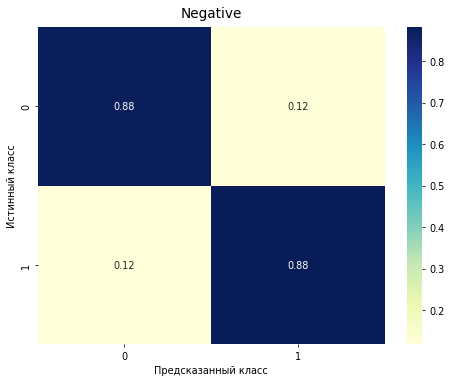

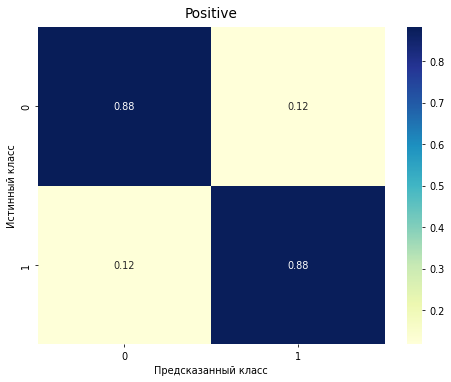

In [17]:
get_confusion_matrix_picture(y_test, lr_bow_predict, "LinRegBOW")

#### Support Vector Classification

In [17]:
from sklearn.svm import LinearSVC

In [22]:
svm = LinearSVC(random_state=0, tol=1e-5)

In [23]:
svm = svm.fit(X_train, y_train)

C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
svm_predict = svm.predict(X_test)

2 min 44 sec - train

10 sec - test

In [25]:
print(confusion_matrix(y_test, svm_predict))
print('accuracy:{}'.format(accuracy_score(y_test, svm_predict)))
print('precision:{}'.format(precision_score(y_test, svm_predict ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, svm_predict, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, svm_predict, average='weighted')))

[[4191  709]
 [ 694 4406]]
accuracy:0.8597
precision:0.8596948165579592
recall:0.8597
f1-score:0.8596954732325017


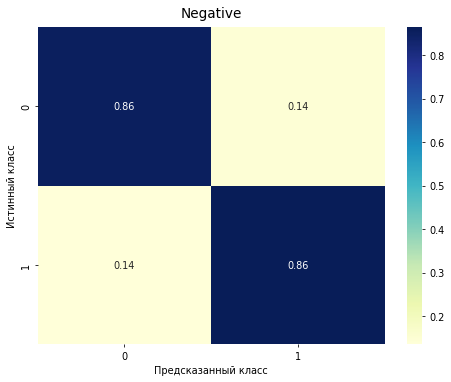

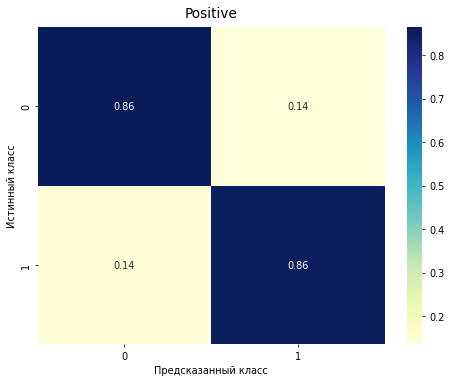

In [28]:
get_confusion_matrix_picture(y_test, svm_predict, "Svm")

### Использование TFiDF и обучение на нём моделей

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
X = df["review"]
y = df["sentiment"]

In [11]:
# Для замены значений целевого признака на 1 и 0
# positive - 1
# negative - 0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#Applying TF-IDF vectorizer
tv = TfidfVectorizer()

#Fitting model on entire data
tv_fit = tv.fit(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [13]:
X_train = tv_fit.transform(X_train)
X_test = tv_fit.transform(X_test)

#### MultinomialNB

In [18]:
modelNB = MultinomialNB()

In [19]:
modelNB.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = modelNB.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print('accuracy:{}'.format(accuracy_score(y_test, y_pred)))
print('precision:{}'.format(precision_score(y_test, y_pred ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, y_pred, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, y_pred, average='weighted')))

[[4310  590]
 [ 793 4307]]
accuracy:0.8617
precision:0.8624088122035468
recall:0.8617
f1-score:0.8616991577529243


FileNotFoundError: [Errno 2] No such file or directory: 'MultinomialNB tfidf/0.png'

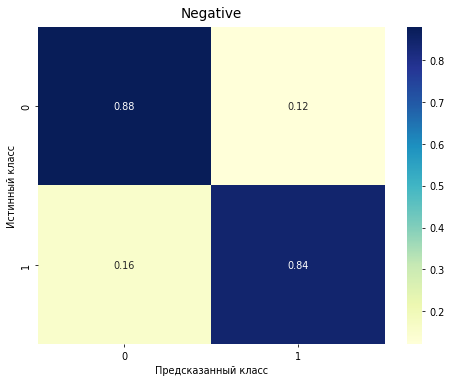

In [22]:
get_confusion_matrix_picture(y_test, y_pred, "MultinomialNB tfidf")

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(penalty='l2',max_iter=100,C=1,random_state=42)

#Обучение модели на bag of words
lr_tfidf = lr.fit(X_train, y_train)
print(lr_tfidf)

LogisticRegression(C=1, random_state=42)


In [25]:
lr_tfidf_predict = lr_tfidf.predict(X_test)

In [26]:
print(confusion_matrix(y_test, lr_tfidf_predict))
print('accuracy:{}'.format(accuracy_score(y_test, lr_tfidf_predict)))
print('precision:{}'.format(precision_score(y_test, lr_tfidf_predict ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, lr_tfidf_predict, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, lr_tfidf_predict, average='weighted')))

[[4324  576]
 [ 476 4624]]
accuracy:0.8948
precision:0.8949160256410258
recall:0.8948
f1-score:0.8947684115704134


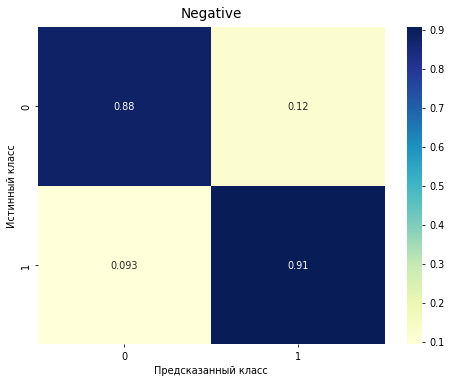

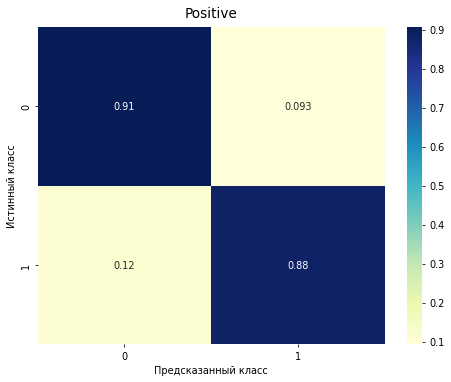

In [28]:
get_confusion_matrix_picture(y_test, lr_tfidf_predict, "LinRegTFiDF")

#### Support Vector Classification

In [27]:
from sklearn.svm import LinearSVC

In [28]:
svm = LinearSVC(random_state=0, tol=1e-5)

In [29]:
svm = svm.fit(X_train, y_train)

In [30]:
svm_predict = svm.predict(X_test)

In [31]:
print(confusion_matrix(y_test, svm_predict))
print('accuracy:{}'.format(accuracy_score(y_test, svm_predict)))
print('precision:{}'.format(precision_score(y_test, svm_predict ,average='weighted')))
print('recall:{}'.format(recall_score(y_test, svm_predict, average='weighted')))
print('f1-score:{}'.format(f1_score(y_test, svm_predict, average='weighted')))

[[4328  572]
 [ 519 4581]]
accuracy:0.8909
precision:0.8909208118113479
recall:0.8909
f1-score:0.8908853614109856


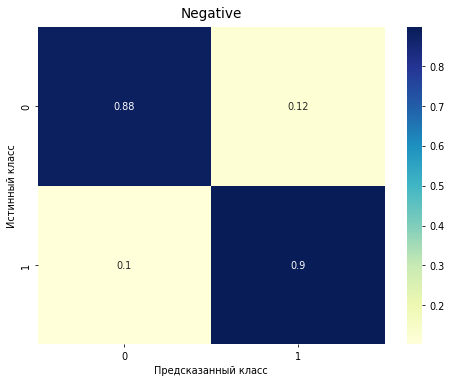

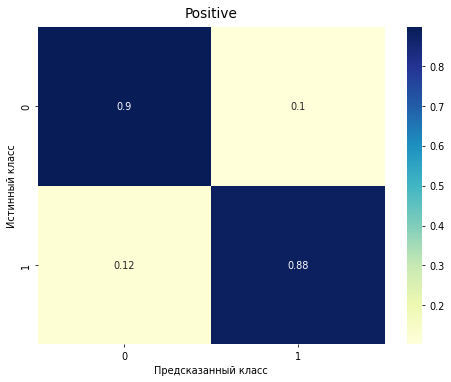

In [51]:
get_confusion_matrix_picture(y_test, svm_predict, "SvmTFiDF")

### Hugging Face's SetFit

In [ ]:
!pip install sentence_transformers

In [ ]:
!pip install setfit

In [8]:
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import Dataset

C:\Users\Иван\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


ModuleNotFoundError: No module named 'setfit'

In [ ]:
setfit_df = df.copy()

# переименование колонок для API SetFit
setfit_df = setfit_df.rename(columns={'review':'text','sentiment':'label'})

encoder = LabelEncoder()
setfit_df["label"] = encoder.fit_transform(setfit_df["label"])
setfit_df

,text,label
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,think wonder way spend time hot summer weekend...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,think movi right good job creativ origin first...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol teach parochi elementari school nun tea...,0
49998,go disagre previous comment side maltin one se...,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(setfit_df["text"], setfit_df["label"], test_size=0.2, random_state = 5)

In [13]:
train_set = pd.DataFrame([X_train, y_train]).T
test_set = pd.DataFrame([X_test, y_test]).T

In [14]:
data_train = Dataset.from_pandas(train_set, preserve_index=False)
data_eval =  Dataset.from_pandas(test_set, preserve_index=False)

In [15]:
# load model,make sure that you active GPU for reasonable run time 
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=data_train,
    eval_dataset=data_eval,
    loss_class=CosineSimilarityLoss,
    batch_size=8,
    learning_rate = 2e-05,
    num_iterations=40, # Number of text pairs to generate for contrastive learning
    num_epochs=1 # Number of epochs to use for contrastive learning
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [16]:
trainer.train()

***** Running training *****
  Num examples = 3200000
  Num epochs = 1
  Total optimization steps = 400000
  Total train batch size = 8
Epoch:   0%|          | 0/1 [13:50:27<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
metrics = trainer.evaluate()

: 

In [ ]:
metrics

: 

In [ ]:
test_pred = trainer.model.predict(data_eval['text'])

: 

In [ ]:
get_confusion_matrix_picture(data_eval['label'], test_pred, "SetFit")

: 